# Curvas de Declinación


Las curvas de declinación de producción son herramientas esenciales para predecir la producción futura de un pozo o yacimiento a partir de datos históricos. Estas curvas ayudan a los ingenieros a entender el comportamiento del yacimiento y a tomar decisiones informadas sobre la gestión y optimización de la producción.



## Tipos de Curvas de Declinación

Existen varios tipos de curvas de declinación, cada una adecuada para diferentes condiciones de yacimientos y mecanismos de producción. Las más comunes son:



1. **Curva de declinación Exponencial**: 
* En esta declinación, la tasa de producción disminuye a un ritmo constante en términos porcentuales. Es utilizada cuando la producción disminuye debido a la presión decreciente del yacimiento y no se presentan otros factores significativos que afecten la producción.
* Formula: $q=qie^{-Dit}$ 


2. **Curva de Declinación Hyperbólica**:
* En esta declinación, la tasa de producción disminuye más lentamente al inicio y luego más rápido. Es útil para yacimientos donde los mecanismos de recuperación son más complejos.
* Formula:  $q=\frac{qi}{(1+bDit)^{1/b}}$ 

3. **Curva de Declinación Armónica**:
* En este caso, la tasa de declinación disminuye a medida que el tiempo avanza. Se aplica cuando la declinación se ralentiza con el tiempo y puede ser un caso especial de la declinación hiperbólica cuando (b=1)
* Formula:  $q=\frac{qi}{(1+Dit)}$ 




# Contenido
- [ 1 - Introducción ](#1)
  - [ 1.1 Objetivo](#1.1)
- [ 2 - Imports Necesarios](#2)
- [ 3 - Exploración](#3)
  - [ 3.1 Datos](#3.1)
  - [ 3.2 Visualización](#3.2)
- [ 4 - Funciones Auxiliares](#4)
  - [ 4.1 - Función de declinación Exponencial](#4.1)
  - [ 4.2 - Función de declinación Armónica](#4.2)
  - [ 4.3 - Función de declinación Hyperbólica](#4.3)
- [ 5 - Regresión Lineal](#5)
- [ 6 - Curva de Declinación Exponencial](#6)
- [ 7 - Curva de Declinación Hyperbólica](#7)
- [ 8 - Curva de Declinación Armónica](#7)



<a name="1"></a>

## 1 - Introducción 
En este notebook, exploraremos las principales curvas de declinación utilizadas en la industria petrolera:
1. Curva de Declinación Exponencial 
2. Curva de Declinación Hiperbólica
3. Curva de Declinación Armónica
Cada uno de estos modelos tiene su propio conjunto de supuestos y aplicabilidad dependiendo de las características del yacimiento.



<a name="1.1"></a>

### 1.1 Objetivo

El objetivo de este estudio es ajustar estos modelos de declinación a datos históricos de producción para realizar predicciones precisas y optimizar la gestión del yacimiento. Se trabajará con un conjunto de datos en formato csv que contiene la producción histórica de un pozo o yacimiento.



<a name="2"></a>
## 2 - Imports Necesarios

El siguiente bloque de código importará las bibliotecas necesarias para ejecutar este notebook..

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
import plotly.io as pio
pio.renderers.default = 'notebook'

<a name="2"></a>
## 3 - Exploración


<a name="3.1"></a>

### 3.1 Datos

Los datos utilizados en este análisis están almacenados en un archivo CSV y contienen las siguientes Columnas:
* Fecha
* Producción de Petróleo (bbl/d)
* Producción de Agua (bbl/d)

In [67]:
#Leer la data a trabajar
df=pd.read_csv('declinación.csv', sep=',')

In [68]:
#Conocer el tipo de Datos
print(df.dtypes)
#Visualizar los primeros 5 registros.
df.head()

Pozo             object
Fecha            object
qoP [bbl/DC]    float64
qwP [bbl/DC]    float64
dtype: object


,Pozo,Fecha,qoP [bbl/DC],qwP [bbl/DC]
0,WELL1,1/05/2013,86.0,12.0
1,WELL1,1/06/2013,215.0,13.0
2,WELL1,1/07/2013,283.0,10.0
3,WELL1,1/08/2013,337.0,29.0
4,WELL1,1/09/2013,351.0,35.0


In [69]:
#Se debe convertir la Feature Fecha al tipo Datetime
df['Fecha']=pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
#Revisar el tipo de datos luego de Convertir la Columna Fecha
print(df.dtypes)

Pozo                    object
Fecha           datetime64[ns]
qoP [bbl/DC]           float64
qwP [bbl/DC]           float64
dtype: object


In [70]:
#Obtener mestadísticas Descriptivas
df.describe()


,Fecha,qoP [bbl/DC],qwP [bbl/DC]
count,128,126.000000,126.000000
mean,2018-08-16 10:07:30,269.484127,439.571429
min,2013-05-01 00:00:00,77.000000,10.000000
25%,2015-12-24 06:00:00,173.750000,329.500000
50%,2018-08-16 12:00:00,216.000000,473.500000
75%,2021-04-08 12:00:00,350.750000,580.000000
max,2023-12-01 00:00:00,587.000000,904.000000
std,NaN,122.899161,213.290541


In [71]:
date_stats={'Min Fecha':df['Fecha'].min(), 'Max Fecha':df['Fecha'].max(),
            'Rango de Fechas (dias)':(df['Fecha'].max()-df['Fecha'].min()).days, 'registros':len(df['Fecha'])}
date_stats_df=pd.DataFrame([date_stats])
date_stats_df


,Min Fecha,Max Fecha,Rango de Fechas (dias),registros
0,2013-05-01,2023-12-01,3866,128


<a name="3.2"></a>

### 3.2 Visualización
Se utilizarán dos formas para visualizar la data de producción de Aceite y de Agua.El primer gráfico será una representación estática de la producción e petróleo y agua a lo largo del tiempo.El segundo gráfico será una visualización dinámica que permitirá explorar los datos de manera interactiva.

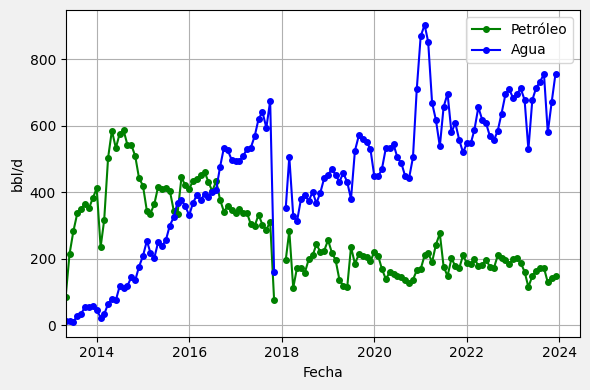

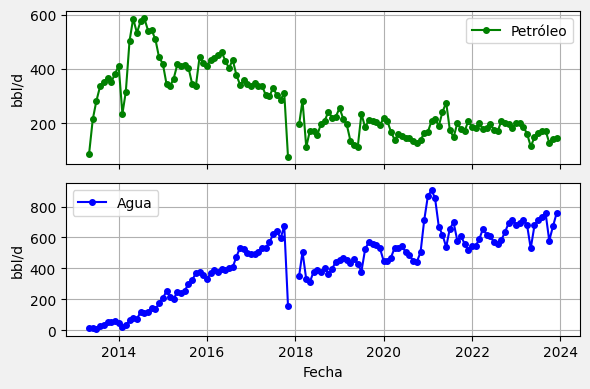

In [72]:
#Grafico Estático
fig=plt.figure(figsize=(6,4), facecolor='#f1f1f1')

plt.plot(df['Fecha'], df['qoP [bbl/DC]'],label='Petróleo', color='green', marker='o', markersize=4)
plt.plot(df['Fecha'], df['qwP [bbl/DC]'],label='Agua', color='blue', marker='o', markersize=4)
plt.xlabel('Fecha')
plt.ylabel('bbl/d')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.xlim(pd.to_datetime('2013-05-01',format='%Y-%m-%d'))
plt.show()

#Gráfico estático
fig, axes=plt.subplots(figsize=(6,4), nrows=2,facecolor='#f1f1f1', sharex=True)

axes[0].plot(df['Fecha'], df['qoP [bbl/DC]'],label='Petróleo', color='green',marker='o', markersize=4)
axes[0].legend()
axes[0].grid(True)

axes[0].set_ylabel('bbl/d')

axes[1].plot(df['Fecha'], df['qwP [bbl/DC]'],label='Agua', color='blue',marker='o', markersize=4)
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('bbl/d')

plt.xlabel('Fecha')
fig.tight_layout()
plt.show()

In [ ]:
# Gráfico Dinámico
df['qoP [bbl/DC]']=df['qoP [bbl/DC]'].fillna(0)
df['qwP [bbl/DC]']=df['qwP [bbl/DC]'].fillna(0)

warnings.filterwarnings("ignore", category=FutureWarning)

Colores={'qoP [bbl/DC]':'green', 'qwP [bbl/DC]':'blue'}
fig=px.line(df, x='Fecha', y=['qoP [bbl/DC]', 'qwP [bbl/DC]'],
            color_discrete_map=Colores, markers='*')

fig.update_layout(legend_title_text='Tipo de Producción',
                  title={'text':'Producción de Aceite y Agua a lo largo del tiempo',
                         'x':0.5, 'xanchor':'center', 'font':{'size':20,'family':'Arial', 'color':'black'}},
                         xaxis_title={'text':'Fecha','font':{'size':16, 'family':'Arial'}},
                         yaxis_title={'text':'Producción bbl/d','font':{'size':16, 'family':'Arial'}}
                         )



fig.show()


<a name="4"></a>
## 4 - Funciones Auxiliares

Esta sección presenta ### funciones auxiliares. Estas funciones ya han sido codificadas, eliminando la necesidad de preocuparse por su implementación. Sin embargo, es fundamental examinarlos detenidamente para comprender su uso adecuado.

<a name="4.1"></a>
### 4.1 - Función Declinación Exponencial

This function has as input a [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) and two indexes to swap the rows corresponding to those indexes. It **does not change the original matrix**, but returns a new one.

In [583]:
def func_exp(t, qi, Di):
    """
    Modelo de declinación exponencial para la producción de petróleo.

    Parámetros:
    t (float o array-like): Tiempo en días desde el inicio de la medición.
    qi (float): Tasa de producción inicial en bbl/DC (barriles por día).
    Di (float): Tasa de declinación inicial (constante de declinación) en unidades inversas de tiempo (1/días).

    Retorna:
    float o array-like: Tasa de producción en el tiempo t.
    """
    return qi * np.exp(-Di * t)

<a name="4.2"></a>
### 4.2 - Función Declinación Armónica

This function has as input a [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) and two indexes to swap the rows corresponding to those indexes. It **does not change the original matrix**, but returns a new one.

In [584]:
def func_arm(t, qi, Di):
    """
    Modelo de declinación armónica para la producción de petróleo.

    Parámetros:
    t (float o array-like): Tiempo en días desde el inicio de la medición.
    qi (float): Tasa de producción inicial en bbl/DC (barriles por día).
    Di (float): Tasa de declinación inicial en unidades inversas de tiempo (1/días).

    Retorna:
    float o array-like: Tasa de producción en el tiempo t.
    """
    return qi / (1 + Di * t)

<a name="3.3"></a>
### 4.3 - Función Declinación Hiperbólica

This function has as input a [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) and two indexes to swap the rows corresponding to those indexes. It **does not change the original matrix**, but returns a new one.

In [585]:
def func_hyper(t, qi, Di, b):
    """
    Modelo de declinación hiperbólica para la producción de petróleo.

    Parámetros:
    t (float o array-like): Tiempo en días desde el inicio de la medición.
    qi (float): Tasa de producción inicial en bbl/DC (barriles por día).
    Di (float): Tasa de declinación inicial en unidades inversas de tiempo (1/días).
    b (float): Exponente de la declinación hiperbólica.

    Retorna:
    float o array-like: Tasa de producción en el tiempo t.
    """
    return qi / ((1 + b * Di * t) ** (1 / b))

<a name="5"></a>
## 5 - Regresión Lineal

Esta sección presenta ### funciones auxiliares. Estas funciones ya han sido codificadas, eliminando la necesidad de preocuparse por su implementación. Sin embargo, es fundamental examinarlos detenidamente para comprender su uso adecuado.

In [586]:
historical_dates = pd.date_range(start='2024-01-01', end='2029-12-31', freq='MS')
df_pred=pd.DataFrame({'Fecha':historical_dates})
df_pred['Fecha_Num'] = df_pred['Fecha'].map(pd.Timestamp.toordinal)
df_=df.copy()

In [587]:
df=df[(df['Fecha']>='2017-01-01')]
# Crear una columna numérica para las fechas para usarla en la regresión
df['Fecha_Num'] = df['Fecha'].map(pd.Timestamp.toordinal)

# Preparar los datos para la regresión lineal
X = df[['Fecha_Num']].values
y_qoP = df[['qoP [bbl/DC]']].values

# Crear y ajustar el modelo de regresión lineal para qoP
model_qoP = LinearRegression()
model_qoP.fit(X, y_qoP)

# Hacer predicciones
df['Pred_qoP'] = model_qoP.predict(X)

# Calcular métricas para qoP
mse_qoP = mean_squared_error(y_qoP, df['Pred_qoP'])
mae_qoP = mean_absolute_error(y_qoP, df['Pred_qoP'])
r2_qoP = r2_score(y_qoP, df['Pred_qoP'])

# Imprimir las métricas
print("Métricas para la predicción de qoP:")
print(f"MSE: {mse_qoP}")
print(f"MAE: {mae_qoP}")
print(f"R²: {r2_qoP}")





Métricas para la predicción de qoP:
MSE: 3672.395764775594
MAE: 42.658725742631674
R²: 0.13334920708013887


In [588]:
# Visualizar los resultados para qoP
fig_qoP = px.line(df, x='Fecha', y='qoP [bbl/DC]', title='Producción de Aceite a lo largo del tiempo', markers='*')
fig_qoP.update_traces(line=dict(color='green'))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['Pred_qoP'], mode='lines', name='Predicción qoP', line=dict(color='darkgreen', dash='dash')))
fig_qoP.update_layout(
    legend_title_text='Tipo de Producción',
    xaxis_title={'text': 'Fecha', 'font': {'size': 16, 'family': 'Arial'}},
    yaxis_title={'text': 'Producción de Aceite (bbl/d)', 'font': {'size': 16, 'family': 'Arial'}}
)
fig_qoP.show()


<a name="6"></a>
## 6 - Curva de Declinación Exponencial

In [589]:
#Se normaliza la Caracteristica Fecha_num para no tener porblemas de desbordamiento
#Al usar el modelo de declinación exponencial, ya que np.exp al tener valores muy grande
# sufre desbordamiento por lo que curve_fit no puede calcular las constantes qi y Di
scaler=MinMaxScaler(feature_range=(0,1))
df['Fecha_norm']=scaler.fit_transform(df[['Fecha_Num']])
df_pred['Fecha_norm']=scaler.transform(df_pred[['Fecha_Num']])

#Convertimos a array las columnas a ajustar con el modelo exponencial
yo=df['qoP [bbl/DC]'].values
X=df['Fecha_norm'].values

#utilizamos curve_fit para encontrar las constantes qi y Di
popt_exp, pcov_exp = curve_fit(func_exp,X, yo)

print(f'qi : {popt_exp[0]}, Di : {popt_exp[1]}' )
#Calculamos los valores predichos con el modelo Exponencial
df['qo_pred_exp']=func_exp(df['Fecha_norm'],popt_exp[0],popt_exp[1])

# Calcular métricas para qoP
mse_qoP = mean_squared_error(df['qoP [bbl/DC]'], df['qo_pred_exp'])
mae_qoP = mean_absolute_error(df['qoP [bbl/DC]'], df['qo_pred_exp'])
r2_qoP = r2_score(df['qoP [bbl/DC]'], df['qo_pred_exp'])

# Imprimir las métricas
print("Métricas para la predicción de qoP:")
print(f"MSE: {mse_qoP}")
print(f"MAE: {mae_qoP}")
print(f"R²: {r2_qoP}")


df['qo_pred_exp_sahara']=func_exp(df['Fecha_norm'],457,0.9155)
df_pred['qo_pred_exp']=func_exp(df_pred['Fecha_norm'],popt_exp[0],popt_exp[1])

# Calcular métricas para qoP
mse_qoP = mean_squared_error(df['qoP [bbl/DC]'], df['qo_pred_exp_sahara'])
mae_qoP = mean_absolute_error(df['qoP [bbl/DC]'], df['qo_pred_exp_sahara'])
r2_qoP = r2_score(df['qoP [bbl/DC]'], df['qo_pred_exp_sahara'])

print("")
# Imprimir las métricas
print("Métricas para la predicción de qoP con valores de SAHARA CA246:")
print(f"MSE: {mse_qoP}")
print(f"MAE: {mae_qoP}")
print(f"R²: {r2_qoP}")
df_pred

qi : 240.9358344965516, Di : 0.45896073586404457
Métricas para la predicción de qoP:
MSE: 3622.680109238295
MAE: 42.518585130508306
R²: 0.14508163328136658

Métricas para la predicción de qoP con valores de SAHARA CA246:
MSE: 17742.80384185761
MAE: 106.74682741778666
R²: -3.1871345037636694


,Fecha,Fecha_Num,Fecha_norm,qo_pred_exp
0,2024-01-01,738886,1.012277,151.401485
1,2024-02-01,738917,1.024554,150.550772
2,2024-03-01,738946,1.036040,149.759272
3,2024-04-01,738977,1.048317,148.917787
4,2024-05-01,739007,1.060198,148.107948
...,...,...,...,...
67,2029-08-01,740925,1.819802,104.513160
68,2029-09-01,740956,1.832079,103.925909
69,2029-10-01,740986,1.843960,103.360743
70,2029-11-01,741017,1.856238,102.779968


In [590]:
# Visualizar los resultados para qoP
fig_qoP = px.line(df_, x='Fecha', y='qoP [bbl/DC]', title='Producción de Aceite a lo largo del tiempo', markers='*')
fig_qoP.update_traces(line=dict(color='green'))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['Pred_qoP'], mode='lines', name='Predicción lin qo', line=dict(color='black', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['qo_pred_exp'], mode='lines', name='Predicción exp qo', line=dict(color='red', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df_pred['Fecha'], y=df_pred['qo_pred_exp'], mode='lines', name='Predicción exp qo', line=dict(color='pink', dash='dash')))
fig_qoP.update_layout(
    legend_title_text='Tipo de Producción',
    xaxis_title={'text': 'Fecha', 'font': {'size': 16, 'family': 'Arial'}},
    yaxis_title={'text': 'Producción de Aceite (bbl/d)', 'font': {'size': 16, 'family': 'Arial'}}
)
fig_qoP.show()

<a name="7"></a>
## 7 - Curva de declinación Hyperbólica


In [596]:

#Convertimos a array las columnas a ajustar con el modelo exponencial
yo=df['qoP [bbl/DC]'].values
X=df['Fecha_norm'].values

popt_exp, pcov_exp=curve_fit(func_hyper, X, yo, bounds=([0,0, 1e-10],[np.inf,np.inf,np.inf]))
df['qo_pred_hyp']=func_hyper(df['Fecha_norm'],popt_exp[0],popt_exp[1],popt_exp[2])
df_pred['qo_pred_hyp']=func_hyper(df_pred['Fecha_norm'],popt_exp[0],popt_exp[1],popt_exp[2])
print(f'qi : {popt_exp[0]}, Di : {popt_exp[1]}, b : {popt_exp[2]}' )

# Calcular métricas para qoP
mse_qoP = mean_squared_error(df['qoP [bbl/DC]'], df['qo_pred_hyp'])
mae_qoP = mean_absolute_error(df['qoP [bbl/DC]'], df['qo_pred_hyp'])
r2_qoP = r2_score(df['qoP [bbl/DC]'], df['qo_pred_hyp'])

# Imprimir las métricas
print("Métricas para la predicción de qoP:")
print(f"MSE: {mse_qoP}")
print(f"MAE: {mae_qoP}")
print(f"R²: {r2_qoP}")



qi : 367.8428605738425, Di : 21.468441967421324, b : 5.869711557448377
Métricas para la predicción de qoP:
MSE: 2978.49669670883
MAE: 38.24262578313731
R²: 0.2971028480451292


In [604]:
# Visualizar los resultados para qoP
fig_qoP = px.line(df_, x='Fecha', y='qoP [bbl/DC]', title='Producción de Aceite a lo largo del tiempo', markers='*')
fig_qoP.update_traces(line=dict(color='green'))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['qo_pred_exp'], mode='lines', name='Data Ajuste exp qo', line=dict(color='red', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['qo_pred_hyp'], mode='lines', name='Data Ajuste qo', line=dict(color='blue', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df_pred['Fecha'], y=df_pred['qo_pred_exp'], mode='lines', name='Predicción exp qo', line=dict(color='pink', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df_pred['Fecha'], y=df_pred['qo_pred_hyp'], mode='lines', name='Predicción hyp qo', line=dict(color='lightblue', dash='dash')))
fig_qoP.update_layout(
    legend_title_text='Tipo de Producción',
    xaxis_title={'text': 'Fecha', 'font': {'size': 16, 'family': 'Arial'}},
    yaxis_title={'text': 'Producción de Aceite (bbl/d)', 'font': {'size': 16, 'family': 'Arial'}}
)
fig_qoP.show()

<a name="8"></a>
## 8 - Curva de Declinación Armónica

In [609]:
popt_exp,pcov_exp=curve_fit(func_arm,X,yo, bounds=([0,0],[np.inf,np.inf]))

df['qo_pred_arm']=func_arm(X,popt_exp[0],popt_exp[1])
df_pred['qo_pred_arm']=func_arm(df_pred['Fecha_norm'],popt_exp[0],popt_exp[1])

print(f'qi : {popt_exp[0]}, Di : {popt_exp[1]}')

qi : 251.7336988749985, Di : 0.6666259217504242


In [613]:
# Visualizar los resultados para qoP
fig_qoP = px.line(df_, x='Fecha', y='qoP [bbl/DC]', title='Producción de Aceite a lo largo del tiempo',markers='*')
fig_qoP.update_traces(line=dict(color='green'))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['qo_pred_exp'], mode='lines', name='Data Ajuste exp qo', line=dict(color='red', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['qo_pred_hyp'], mode='lines', name='Data Ajuste qo', line=dict(color='blue', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df['Fecha'], y=df['qo_pred_arm'], mode='lines', name='Data Ajuste arm qwP', line=dict(color='purple', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df_pred['Fecha'], y=df_pred['qo_pred_exp'], mode='lines', name='Predicción exp qo', line=dict(color='pink', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df_pred['Fecha'], y=df_pred['qo_pred_hyp'], mode='lines', name='Predicción hyp qo', line=dict(color='lightblue', dash='dash')))
fig_qoP.add_trace(go.Scatter(x=df_pred['Fecha'], y=df_pred['qo_pred_arm'], mode='lines', name='Predicción hyp qo', line=dict(color='#D8BFD8', dash='dash')))

fig_qoP.update_layout(
    legend_title_text='Tipo de Producción',
    xaxis_title={'text': 'Fecha', 'font': {'size': 16, 'family': 'Arial'}},
    yaxis_title={'text': 'Producción de Aceite (bbl/d)', 'font': {'size': 16, 'family': 'Arial'}}
)
fig_qoP.show()